In [135]:
import pandas as pd

import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import matplotlib.pylab as pylab

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Working with time series using `statsmodels`

## Define helpers

In [67]:
def plot_series(series, labels = None, title = None, lw = 1, alpha = .7):
    
    if type(series) != list:
        
        plt.figure(figsize = (15, 6))
        plt.plot(series, label = labels, lw = lw)
        plt.legend()
        plt.title(title)
        plt.xticks(rotation = 45)
        plt.plot()
    
    else:
        
        plt.figure(figsize = (15, 6))
        
        if type(labels) != list:
            labels = [x for x in range(len(series))]
            
        for serie, label in zip(series, labels):
            
            plt.plot(serie, label = label, alpha = alpha, lw = lw)
        
        plt.xticks(rotation = 45)
        plt.legend()
        plt.title(title)
        plt.plot()

* ### Examine the data

In [28]:
# Get data
data = sm.datasets.macrodata.load_pandas().data

In [29]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,203.0,1983.876847,14.686817,1959.000,1971.0000,1984.000,1996.5000,2009.000
quarter,203.0,2.492611,1.118563,1.000,1.5000,2.000,3.0000,4.000
realgdp,203.0,7221.171901,3214.956044,2710.349,4440.1035,6559.594,9629.3465,13415.266
realcons,203.0,4825.293103,2313.346192,1707.400,2874.1000,4299.900,6398.1500,9363.600
realinv,203.0,1012.863862,585.102267,259.764,519.1475,896.210,1436.6815,2264.721
realgovt,203.0,663.328640,140.863655,460.400,527.9595,662.412,773.0490,1044.088
realdpi,203.0,5310.540887,2423.515977,1886.900,3276.9500,4959.400,6977.8500,10077.500
cpi,203.0,105.075788,61.278878,28.980,41.0500,104.100,159.6500,218.610
m1,203.0,667.927586,455.346381,139.600,228.6500,540.900,1102.1000,1673.900
tbilrate,203.0,5.311773,2.803071,0.120,3.5150,5.010,6.6650,15.330


* ### Transform the data

In [31]:
# Get year as index
data = data.set_index(pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3')), drop = True)

In [32]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Analysis

[]

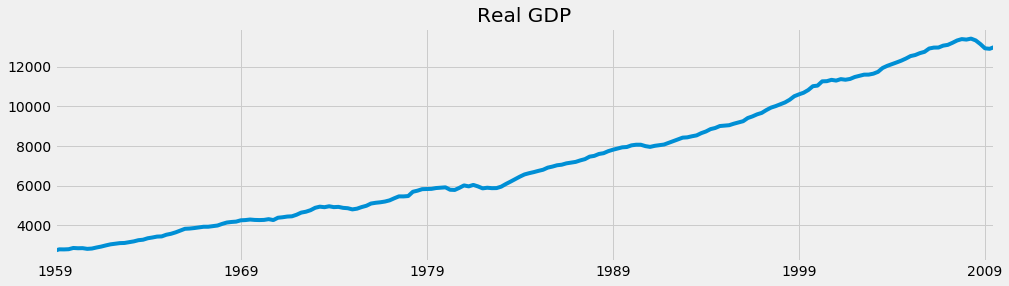

In [41]:
data.realgdp.plot(figsize = (15, 4))
plt.title('Real GDP')
plt.plot()

* ### Cycle and trend

In [57]:
# Let's extract trend
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(data.realgdp)

**NOTE**: `hpfilter` returns a `tuple`. `0` contains cycle and `1` contains trend.

[]

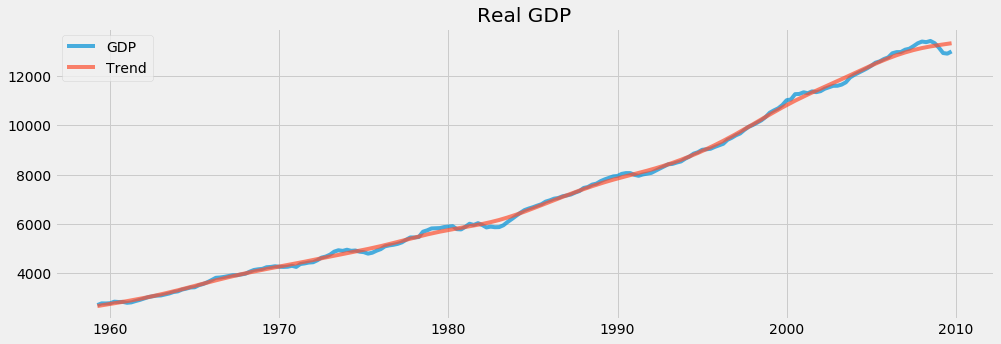

In [58]:
plt.figure(figsize = (15, 5))
plt.plot(data.realgdp, label = 'GDP', alpha = .7)
plt.plot(gdp_trend, label = 'Trend', alpha = .7)
plt.legend()
plt.title('Real GDP')
plt.plot()

## Definitions

**ETS models**

    **ETS** stands for Error-Trend-Seasonality

**SMA**

    Simple Moving Average
    
**EWMA**

    Exponentially Weighted Moving Average

## SMA

In [96]:
# Get the data
airlines = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

In [97]:
airlines.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [98]:
# Month to datetime
airlines = airlines.set_index(pd.to_datetime(airlines.Month), drop = True).drop('Month', axis = 1)

In [99]:
airlines.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


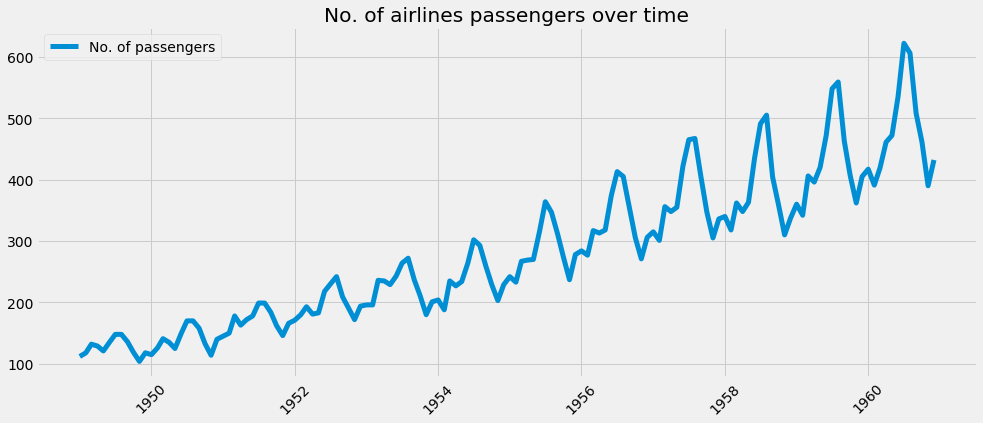

In [100]:
# Plot the data
plot_series(airlines, 'No. of passengers', 'No. of airlines passengers over time', lw = 5)

In [101]:
# Let's start with SMA
airlines['SMA6'] = airlines.Passengers.rolling(6).mean()
airlines['SMA12'] = airlines.Passengers.rolling(12).mean()

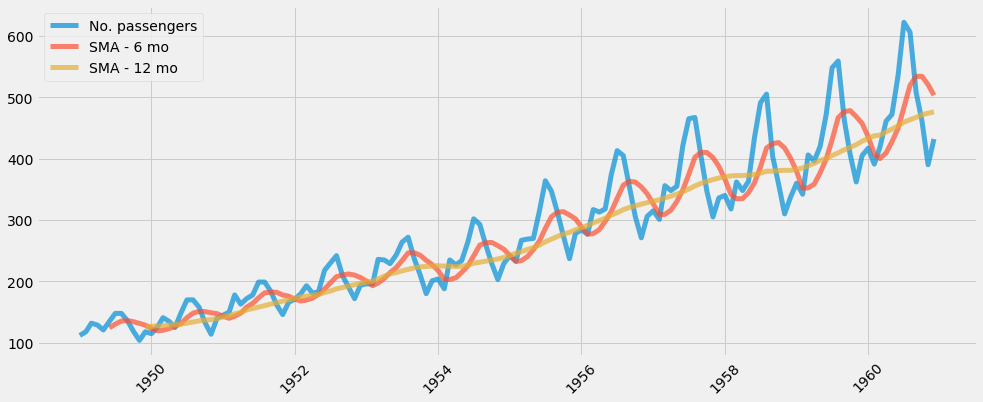

In [102]:
# Chek it out
plot_series([airlines.Passengers, airlines.SMA6, airlines.SMA12], 
            ['No. passengers', 'SMA - 6 mo', 'SMA - 12 mo'], lw = 5)

## EWMA

The general formula for **EWMA** is:

$$ \Large y_t = \frac{\sum_{i=0}^t w_i t_{i-1}}{\sum_{i=0}^t w_i}$$

This can be also written as follows:

$$ \Large y_t = \frac{x_t+(1-\alpha)x_{t-1}+(1-\alpha)^2x_{t-2}+...+(1-\alpha)^tx_{t0}}{1+(1-\alpha)+(1-\alpha)^2+...+(1-\alpha)^t}$$

In [103]:
airlines['EWMA6'] = airlines.Passengers.ewm(span = 6).mean()
airlines['EWMA12'] = airlines.Passengers.ewm(span = 12).mean()

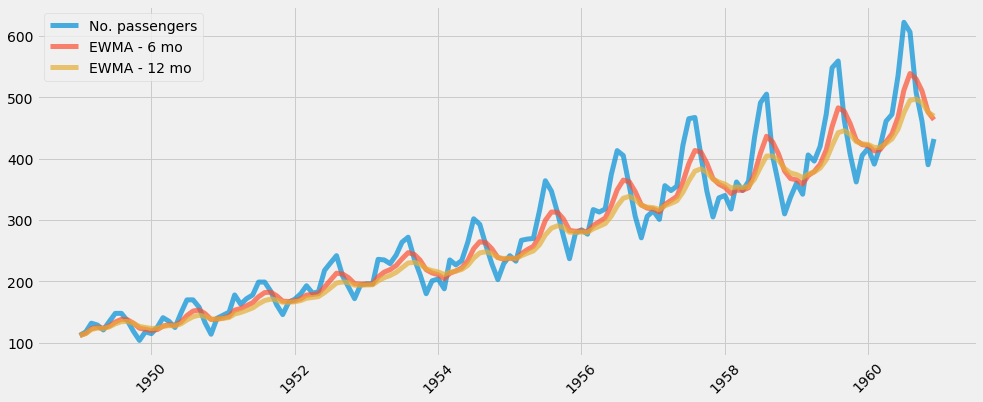

In [105]:
# Check it out
plot_series([airlines.Passengers, airlines.EWMA6, airlines.EWMA12], 
            ['No. passengers', 'EWMA - 6 mo', 'EWMA - 12 mo'], lw = 5)

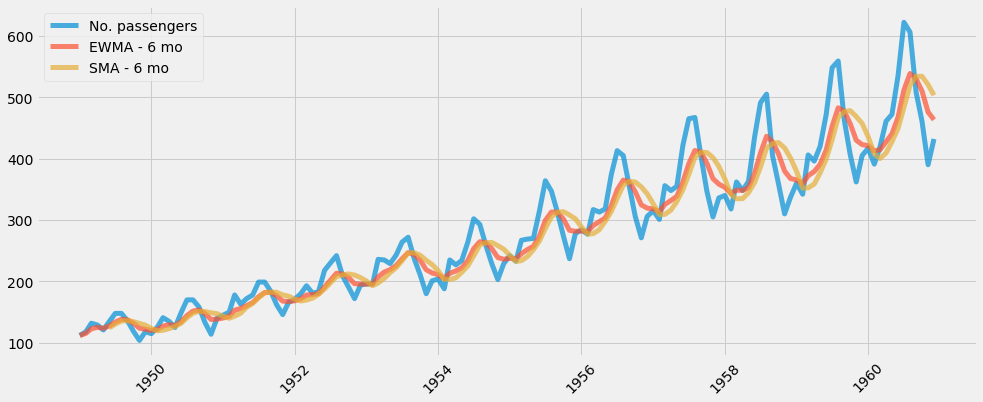

In [108]:
# Compare EWMA and SMA
plot_series([airlines.Passengers, airlines.EWMA6, airlines.SMA6], 
            ['No. passengers', 'EWMA - 6 mo', 'SMA - 6 mo'], lw = 5)

We can also specify **alpha** directly instead of span.

From https://www.investopedia.com/articles/07/ewma.asp:

*For example, RiskMetrics$^{TM}$, a financial risk management company, tends to use a lambda of 0.94, or 94%*

Let's see how their alpha works!

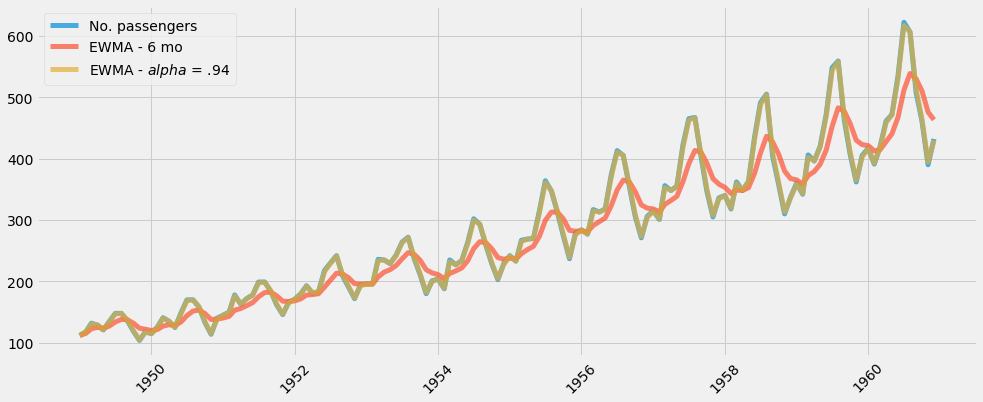

In [117]:
plot_series([airlines.Passengers, airlines.EWMA6, airlines.Passengers.ewm(alpha = .94).mean()], 
            ['No. passengers', 'EWMA - 6 mo', 'EWMA - $alpha$ = .94'], lw = 5)

In case of our data, $\alpha = .94$ is amazingly close to the original series.

## ETS

In [122]:
seasonal_ = seasonal_decompose(airlines.Passengers, model = 'multiplicative')

In [125]:
seasonal_.seasonal.head()

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: Passengers, dtype: float64

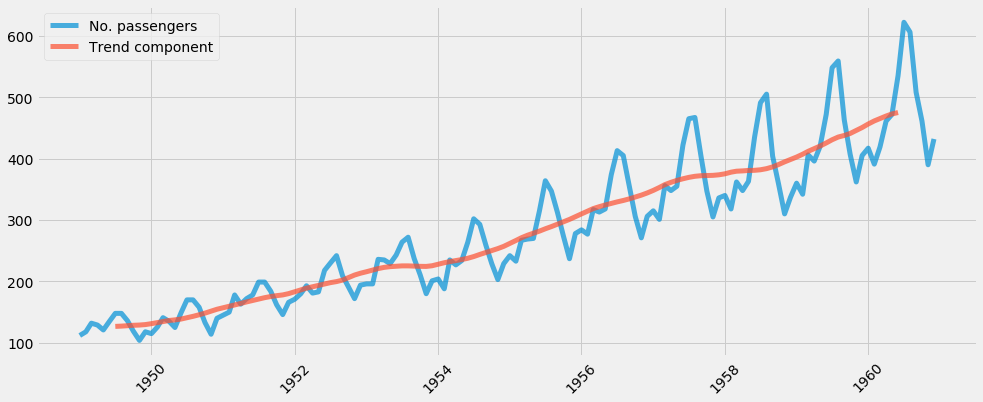

In [129]:
plot_series([airlines.Passengers, seasonal_.trend], 
            ['No. passengers', 'Trend component'], lw = 5)

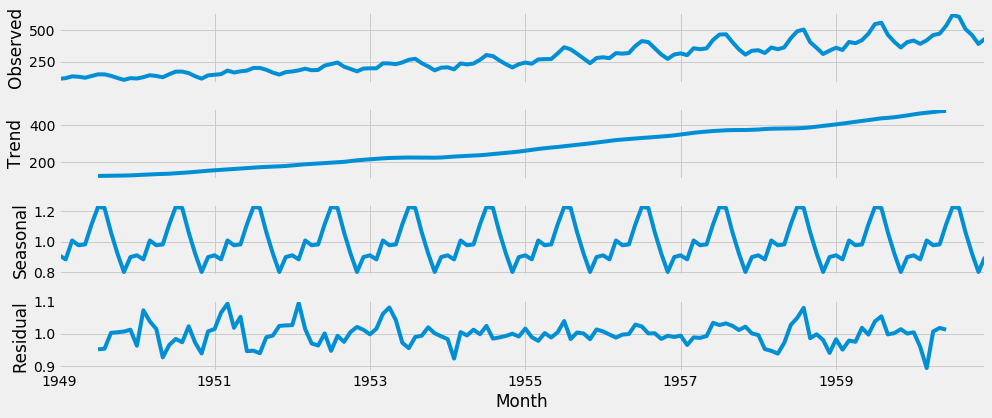

In [136]:
# See all the components
pylab.rcParams['figure.figsize'] = (14, 6)
_ = seasonal_.plot()

In [ ]:
s